In [1]:
import pandas as pd 
import numpy as np
import glob
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import
demographics = pd.read_csv('demographic_results/demographics_processed.csv')

# Set the path to the directory containing the CSV files
folder_path = 'click_results'
# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
# Store DataFrames in a list
dfs_list = [pd.read_csv(file) for file in csv_files]
# Combine dfs
clicks = pd.concat(dfs_list, ignore_index=True)

# Set the path to the directory containing the CSV files
folder_path = 'legend_click_results'
# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
# Store DataFrames in a list
dfs_list = [pd.read_csv(file) for file in csv_files]
# Combine dfs
legend_clicks = pd.concat(dfs_list, ignore_index=True)

# Set the path to the directory containing the CSV files
folder_path = 'hover_results'
# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
# Store DataFrames in a list
dfs_list = [pd.read_csv(file) for file in csv_files]
# Combine dfs
hover_events = pd.concat(dfs_list, ignore_index=True)

# Set the path to the directory containing the CSV files
folder_path = 'timing_results'
# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
# Store DataFrames in a list
dfs_list = [pd.read_csv(file) for file in csv_files]
# Combine dfs
page_visits = pd.concat(dfs_list, ignore_index=True)

/tmp/ipykernel_874/569877031.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hover_events = pd.concat(dfs_list, ignore_index=True)


In [3]:
# Drop demo and tim
clicks = clicks[(clicks['user_id']!='Tim')&(clicks['user_id']!='demo')]
legend_clicks = legend_clicks[(legend_clicks['user_id']!='Tim')&(legend_clicks['user_id']!='demo')]
hover_events = hover_events[(hover_events['user_id']!='Tim')&(hover_events['user_id']!='demo')]
page_visits = page_visits[(page_visits['user_id']!='Tim')&(page_visits['user_id']!='demo')]

# hover_events

In [4]:
# Order of seeing CDSS (1) or SOC (2)
# a and b are opposites of each other
# a = 122121122112
# b = 211212211221
a_list = [1,2,2,1,2,1,1,2,2,1,1,2]
b_list = [2,1,1,2,1,2,2,1,1,2,2,1]

# Define if see cdss or soc
def view_fun(row):
    patient = row['patient']
    user_archetype = row['user_archetype']
    if user_archetype == 'a':
        view = a_list[patient-1]
    elif user_archetype == 'b':
        view = b_list[patient-1]
    if view == 1:
        return 'cdss'
    elif view == 2:
        return 'soc'

hover_events['view'] = hover_events.apply(lambda row: view_fun(row), axis=1)

In [5]:
hover_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23509 entries, 0 to 23560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         23509 non-null  object 
 1   user_archetype  23509 non-null  object 
 2   patient         23509 non-null  object 
 3   component       23509 non-null  object 
 4   hover_duration  23509 non-null  float64
 5   view            23509 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.3+ MB


In [6]:
hover_events

,user_id,user_archetype,patient,component,hover_duration,view
0,37,b,1,patient_details_sex:,0.340,soc
1,37,b,1,patient_details_age:,0.074,soc
2,37,b,1,patient_details_age:,0.543,soc
3,37,b,1,patient_details_sex:,0.094,soc
4,37,b,1,patient_details_ethnicity:,0.208,soc
...,...,...,...,...,...,...
23556,41,b,12,vitals_table_Metric / Time (hours),2.595,cdss
23557,41,b,12,vitals_table_Heart Rate,1.048,cdss
23558,41,b,12,vitals_table_Diastolic Blood Pressure,0.984,cdss
23559,41,b,12,vitals_table_SpO2,5.864,cdss


In [11]:
# Grouping components into broader catergories 

# Define a function to categorize the components
def categorize_component(component_str):
    categories = ['vitals_table', 'similar_table', 'patient_details', 'guidelines_pdf', 'LLM']
    for category in categories:
        if category in component_str:
            return category
    return component_str

# Apply the categorization function to create the new column
hover_events['component_categories'] = hover_events['component'].apply(categorize_component)
component_hover_duration = hover_events.groupby('component_categories')['hover_duration'].sum().reset_index()
component_hover_duration = component_hover_duration.sort_values(by='hover_duration', ascending=False).reset_index(drop=True)
component_hover_duration['mean_hover_duration'] = component_hover_duration['hover_duration'] / 42
component_hover_duration['mean_hover_duration'] = component_hover_duration['mean_hover_duration'].round(2)
component_hover_duration['hover_duration'] = component_hover_duration['hover_duration'].round(2)
component_hover_duration

,component_categories,hover_duration,mean_hover_duration
0,vitals_table,7453.28,177.46
1,echarts_plot,5231.41,124.56
2,guidelines_pdf,1349.90,32.14
3,patient_details,1246.19,29.67
4,similar_table,540.54,12.87
5,guidelines_flowchart,212.88,5.07
6,LLM,194.28,4.63
7,feature_image,173.52,4.13
8,patient_table,171.10,4.07
9,guideline_alert,145.85,3.47


In [10]:
from scipy.stats import levene

# Get groups data
grouped_data = [group['hover_duration'].values for name, group in hover_events.groupby(['patient', 'component_categories'])]

# Perform Levene's Test
stat, p = levene(*grouped_data)
print('Levene’s Test Statistic:', stat, 'P-value:', p)

Levene’s Test Statistic: 32.058552569169734 P-value: 0.0


In [14]:
from scipy.stats import kruskal

# Assuming df is your DataFrame with the necessary data

# Group data by 'component'
grouped_by_component = [group['hover_duration'].values for name, group in hover_events.groupby('component_categories')]

# Perform Kruskal-Wallis Test
stat, p = kruskal(*grouped_by_component)
print('Kruskal-Wallis test for components:')
print('Statistic:', stat, 'P-value:', p)

# Group data by 'patient'
grouped_by_patient = [group['hover_duration'].values for name, group in hover_events.groupby('patient')]

# Perform Kruskal-Wallis Test
stat, p = kruskal(*grouped_by_patient)
print('Kruskal-Wallis test for patients:')
print('Statistic:', stat, 'P-value:', p)

Kruskal-Wallis test for components:
Statistic: 1944.753628293301 P-value: 0.0
Kruskal-Wallis test for patients:
Statistic: 84.17859008085372 P-value: 2.283330528326858e-13


# page_visits

In [4]:
page_visits

,user_id,user_archetype,page_name,entry_time,exit_time
0,15,b,/,2024-06-17 11:33:13.977045+00:00,2024-06-17 11:33:14.131926+00:00
1,15,b,/details,2024-06-17 11:33:14.140396+00:00,2024-06-17 11:33:39.016139+00:00
2,15,b,/patients,2024-06-17 11:33:39.023910+00:00,2024-06-17 11:33:41.556147+00:00
3,15,b,/1/,2024-06-17 11:33:41.563947+00:00,2024-06-17 11:33:44.448222+00:00
4,15,b,/record_hover_event/,2024-06-17 11:33:44.453483+00:00,2024-06-17 11:34:42.400927+00:00
...,...,...,...,...,...
2732,10,a,/12/process_user_input/,2024-06-10 10:34:41.446511+00:00,2024-06-10 10:34:41.532564+00:00
2733,10,a,/patients,2024-06-10 10:34:41.542251+00:00,2024-06-10 10:34:48.253354+00:00
2734,10,a,/sus,2024-06-10 10:34:48.265449+00:00,2024-06-10 10:34:48.433554+00:00
2735,10,a,/sus/,2024-06-10 10:34:48.446694+00:00,2024-06-10 10:36:29.867533+00:00


In [5]:
# Convert 'entry_time' and 'exit_time' columns to datetime
page_visits['entry_time'] = pd.to_datetime(page_visits['entry_time'])
page_visits['exit_time'] = pd.to_datetime(page_visits['exit_time'])

In [7]:
# Mean seconds per prediction or guideline page visit
def update_prediction_exit_times(df):
    # Iterate through the rows of the dataframe
    for i in range(len(df)):
        # Check if the current row is a prediction page
        if '/prediction/' in df.loc[i, 'page_name']:
            # Find the next row where the page name is an integer (e.g., '/2/')
            for j in range(i+1, len(df)):
                if df.loc[j, 'page_name'].strip('/').isdigit():
                    # Update the exit time of the prediction page
                    df.at[i, 'exit_time'] = df.loc[j, 'entry_time']
                    break
                elif df.loc[j, 'page_name'].rstrip('process_user_input/').strip('/').isdigit():
                    # Update the exit time of the prediction page
                    df.at[i, 'exit_time'] = df.loc[j, 'entry_time']
                    break
    
    return df

def calculate_mean_prediction_duration(df):
    # Filter the dataframe for rows where the page name contains 'prediction'
    prediction_df = df[df['page_name'].str.contains('/prediction/')].copy()
    
    # Calculate the visit duration in seconds
    prediction_df['visit_duration'] = (prediction_df['exit_time'] - prediction_df['entry_time']).dt.total_seconds()
    
    # Calculate and return the mean visit duration
    return prediction_df['visit_duration'].mean()

def calculate_std_prediction_duration(df):
    # Filter the dataframe for rows where the page name contains 'prediction'
    prediction_df = df[df['page_name'].str.contains('/prediction/')].copy()
    
    # Calculate the visit duration in seconds
    prediction_df['visit_duration'] = (prediction_df['exit_time'] - prediction_df['entry_time']).dt.total_seconds()
    
    # Calculate and return the mean visit duration
    return prediction_df['visit_duration'].std()

def update_guideline_exit_times(df):
    # Iterate through the rows of the dataframe
    for i in range(len(df)):
        # Check if the current row is a prediction page
        if '/guideline/' in df.loc[i, 'page_name']:
            # Find the next row where the page name is an integer (e.g., '/2/')
            for j in range(i+1, len(df)):
                if df.loc[j, 'page_name'].strip('/').isdigit():
                    # Update the exit time of the prediction page
                    df.at[i, 'exit_time'] = df.loc[j, 'entry_time']
                    break
                elif df.loc[j, 'page_name'].rstrip('process_user_input/').strip('/').isdigit():
                    # Update the exit time of the prediction page
                    df.at[i, 'exit_time'] = df.loc[j, 'entry_time']
                    break
    
    return df

def calculate_mean_guideline_duration(df):
    # Filter the dataframe for rows where the page name contains 'prediction'
    guideline_df = df[df['page_name'].str.contains('/guideline/')].copy()
    
    # Calculate the visit duration in seconds
    guideline_df['visit_duration'] = (guideline_df['exit_time'] - guideline_df['entry_time']).dt.total_seconds()
    
    # Calculate and return the mean visit duration
    return guideline_df['visit_duration'].mean()

def calculate_std_guideline_duration(df):
    # Filter the dataframe for rows where the page name contains 'prediction'
    guideline_df = df[df['page_name'].str.contains('/guideline/')].copy()
    
    # Calculate the visit duration in seconds
    guideline_df['visit_duration'] = (guideline_df['exit_time'] - guideline_df['entry_time']).dt.total_seconds()
    
    # Calculate and return the mean visit duration
    return guideline_df['visit_duration'].std()

# Update the exit times for prediction pages
updated_page_visits = update_prediction_exit_times(page_visits.reset_index(drop=True))
updated_page_visits = update_guideline_exit_times(updated_page_visits)

calculate_mean_prediction_duration(updated_page_visits)
calculate_mean_guideline_duration(updated_page_visits)

calculate_std_prediction_duration(updated_page_visits)
calculate_std_guideline_duration(updated_page_visits)

59.82195606896552

64.51573823529412

66.103466742745

49.375162133038636

In [ ]:
# Identify all `/int/process_user_input/` rows
process_user_input_rows = page_visits[page_visits['page_name'].str.contains('process_user_input')]

# Create a dictionary to map `/int/` page names to their corresponding `/int/process_user_input/` exit times for each user_id
exit_time_mapping = {}
for _, row in process_user_input_rows.iterrows():
    user_id = row['user_id']
    # Extract the `/int/` part from `/int/process_user_input/`
    int_page_name = row['page_name'].split('/process_user_input/')[0] + '/'
    
    if user_id not in exit_time_mapping:
        exit_time_mapping[user_id] = {}
    
    exit_time_mapping[user_id][int_page_name] = row['exit_time']

# Function to update exit_time based on the mapping
def update_exit_time(row):
    user_id = row['user_id']
    page_name = row['page_name']
    
    # Check if the current page_name is an `/int/` and if we have a mapping for it
    if page_name in exit_time_mapping.get(user_id, {}):
        return exit_time_mapping[user_id][page_name]
    
    return row['exit_time']

# Create a new DataFrame to hold the updated data
updated_page_visits = page_visits.copy()
updated_page_visits['exit_time'] = updated_page_visits.apply(update_exit_time, axis=1)

# Update the exit times for prediction and guideline pages
updated_page_visits = update_prediction_exit_times(updated_page_visits.reset_index(drop=True))
updated_page_visits = update_guideline_exit_times(updated_page_visits)

# Calculate visit duration in seconds 
updated_page_visits['visit_duration'] = (updated_page_visits['exit_time'] - updated_page_visits['entry_time']).dt.total_seconds()

# Filter for `/int/` rows and predictions and guideines
explanation_page_visits = updated_page_visits[(updated_page_visits['page_name'].str.fullmatch(r'/\d+/'))|(updated_page_visits['page_name'].str.contains('/prediction/'))|(updated_page_visits['page_name'].str.contains('/guideline/'))]

# Filter to keep only `/int/` rows for the new DataFrame
updated_page_visits = updated_page_visits[updated_page_visits['page_name'].str.fullmatch(r'/\d+/')]

# Drop duplicates - keep first as that is from initial entry of page to end 
updated_page_visits.drop_duplicates(subset=['user_id', 'page_name'], inplace=True)
explanation_page_visits.drop_duplicates(subset=['user_id', 'page_name'], inplace=True)

In [39]:
# Getting % spent on explanations

def calculate_prediction_percentage(df):
    # Create an empty list to store the percentage values
    percentages = []

    # Iterate through the rows of the DataFrame
    for i, row in df.iterrows():
        # Check if the current page_name is in the form of '/int/prediction/'
        if '/prediction/' in row['page_name']:
            # Extract the integer part of the page name
            int_page = row['page_name'].split('/')[1]

            # Find the corresponding /int/ page for the same user_id
            int_row = df[(df['user_id'] == row['user_id']) & (df['page_name'] == f'/{int_page}/')]

            if not int_row.empty:
                # Calculate the percentage
                percentage = (row['visit_duration'] / int_row['visit_duration'].values[0]) * 100
                percentages.append(percentage)
            else:
                # If there's no matching /int/ page, append NaN
                percentages.append(float('nan'))
        else:
            # If the row is not a /prediction/ page, append NaN
            percentages.append(float('nan'))
    
    # Add the percentages to the DataFrame
    df['prediction_percentage'] = percentages

    # Filter the DataFrame to show only the rows with the calculated percentages
    df = df[df['prediction_percentage'].notna()]

    return df

def calculate_guideline_percentage(df):
    # Create an empty list to store the percentage values
    percentages = []

    # Iterate through the rows of the DataFrame
    for i, row in df.iterrows():
        # Check if the current page_name is in the form of '/int/prediction/'
        if '/guideline/' in row['page_name']:
            # Extract the integer part of the page name
            int_page = row['page_name'].split('/')[1]

            # Find the corresponding /int/ page for the same user_id
            int_row = df[(df['user_id'] == row['user_id']) & (df['page_name'] == f'/{int_page}/')]

            if not int_row.empty:
                # Calculate the percentage
                percentage = (row['visit_duration'] / int_row['visit_duration'].values[0]) * 100
                percentages.append(percentage)
            else:
                # If there's no matching /int/ page, append NaN
                percentages.append(float('nan'))
        else:
            # If the row is not a /prediction/ page, append NaN
            percentages.append(float('nan'))
    
    # Add the percentages to the DataFrame
    df['guideline_percentage'] = percentages

    # Filter the DataFrame to show only the rows with the calculated percentages
    df = df[df['guideline_percentage'].notna()]

    return df

prediction_page_visits = calculate_prediction_percentage(explanation_page_visits)
guideline_page_visits = calculate_guideline_percentage(explanation_page_visits)

In [40]:
prediction_page_visits['prediction_percentage'].mean().round(2)
guideline_page_visits['guideline_percentage'].mean().round(2)

24.31

25.45

In [41]:
# Grouping page_name into patients

# Define a function to group page_name by patients
def categorize_page_name(component_str):
    categories = [str(element) for element in list(range(13))]
    categories.reverse() # Reverse so looks for higher numbers first
    for category in categories:
        if category in component_str:
            #print('category:', category)
            return category
    #print(component_str)
    return component_str

# Apply the categorization function to create the new column
updated_page_visits['page_name_categories'] = updated_page_visits['page_name'].apply(categorize_page_name)
grouped_page_visits = updated_page_visits.groupby('page_name_categories')['visit_duration'].mean().reset_index()
grouped_page_visits = grouped_page_visits.sort_values(by='visit_duration', ascending=False).reset_index(drop=True)
grouped_page_visits

,page_name_categories,visit_duration
0,8,191.960032
1,7,189.633062
2,3,159.641792
3,2,157.582800
4,10,150.670838
5,1,149.648716
6,6,149.293572
7,11,143.234015
8,12,137.397348
9,4,132.027069


In [42]:
updated_page_visits

,user_id,user_archetype,page_name,entry_time,exit_time,visit_duration,page_name_categories
3,15,b,/1/,2024-06-17 11:33:41.563947+00:00,2024-06-17 11:34:42.594794+00:00,61.030847,1
7,15,b,/2/,2024-06-17 11:34:44.931904+00:00,2024-06-17 11:35:47.139182+00:00,62.207278,2
11,15,b,/3/,2024-06-17 11:35:49.088784+00:00,2024-06-17 11:37:09.671533+00:00,80.582749,3
15,15,b,/4/,2024-06-17 11:37:19.582371+00:00,2024-06-17 11:39:22.970173+00:00,123.387802,4
19,15,b,/5/,2024-06-17 11:38:11.448290+00:00,2024-06-17 11:40:28.384418+00:00,136.936128,5
...,...,...,...,...,...,...,...
2557,10,a,/8/,2024-06-10 10:20:28.088681+00:00,2024-06-10 10:23:52.159714+00:00,204.071033,8
2561,10,a,/9/,2024-06-10 10:23:54.401972+00:00,2024-06-10 10:24:55.503170+00:00,61.101198,9
2565,10,a,/10/,2024-06-10 10:24:58.402123+00:00,2024-06-10 10:28:30.673384+00:00,212.271261,10
2574,10,a,/11/,2024-06-10 10:28:33.202014+00:00,2024-06-10 10:32:22.143878+00:00,228.941864,11


In [43]:
# Mean time for case vignette
grouped_page_visits['visit_duration'].mean()
grouped_page_visits['visit_duration'].std()

148.49792217216094

26.10235185161553

In [44]:
# Order of seeing CDSS (1) or SOC (2)
# a and b are opposites of each other
# a = 122121122112
# b = 211212211221
a_list = [1,2,2,1,2,1,1,2,2,1,1,2]
b_list = [2,1,1,2,1,2,2,1,1,2,2,1]

# Define if see cdss or soc
def view_fun(row):
    patient = row['patient']
    user_archetype = row['user_archetype']
    if user_archetype == 'a':
        view = a_list[patient-1]
    elif user_archetype == 'b':
        view = b_list[patient-1]
    if view == 1:
        return 'cdss'
    elif view == 2:
        return 'soc'

# filter
patient_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
filtered_page_visits = updated_page_visits[updated_page_visits['page_name_categories'].isin(patient_list)]
filtered_page_visits['patient'] = filtered_page_visits['page_name_categories'].astype(int)
filtered_page_visits['view'] = filtered_page_visits.apply(lambda row: view_fun(row), axis=1)

In [45]:
filtered_page_visits

,user_id,user_archetype,page_name,entry_time,exit_time,visit_duration,page_name_categories,patient,view
3,15,b,/1/,2024-06-17 11:33:41.563947+00:00,2024-06-17 11:34:42.594794+00:00,61.030847,1,1,soc
7,15,b,/2/,2024-06-17 11:34:44.931904+00:00,2024-06-17 11:35:47.139182+00:00,62.207278,2,2,cdss
11,15,b,/3/,2024-06-17 11:35:49.088784+00:00,2024-06-17 11:37:09.671533+00:00,80.582749,3,3,cdss
15,15,b,/4/,2024-06-17 11:37:19.582371+00:00,2024-06-17 11:39:22.970173+00:00,123.387802,4,4,soc
19,15,b,/5/,2024-06-17 11:38:11.448290+00:00,2024-06-17 11:40:28.384418+00:00,136.936128,5,5,cdss
...,...,...,...,...,...,...,...,...,...
2557,10,a,/8/,2024-06-10 10:20:28.088681+00:00,2024-06-10 10:23:52.159714+00:00,204.071033,8,8,soc
2561,10,a,/9/,2024-06-10 10:23:54.401972+00:00,2024-06-10 10:24:55.503170+00:00,61.101198,9,9,soc
2565,10,a,/10/,2024-06-10 10:24:58.402123+00:00,2024-06-10 10:28:30.673384+00:00,212.271261,10,10,cdss
2574,10,a,/11/,2024-06-10 10:28:33.202014+00:00,2024-06-10 10:32:22.143878+00:00,228.941864,11,11,cdss


Assessing if difference across view

In [46]:
# Grouping page_name into patients

# Define a function to group page_name by patients
def categorize_page_name(component_str):
    categories = [str(element) for element in list(range(13))]
    categories.reverse() # Reverse so looks for higher numbers first
    for category in categories:
        if category in component_str:
            #print('category:', category)
            return category
    #print(component_str)
    return component_str

# Apply the categorization function to create the new column
grouped_filtered_page_visits = filtered_page_visits.groupby(['view', 'patient'])['visit_duration'].mean().reset_index()
grouped_filtered_page_visits.rename(columns={'visit_duration': 'mean_visit_duration'}, inplace=True)
grouped_filtered_page_visits_std = filtered_page_visits.groupby(['view', 'patient'])['visit_duration'].std().reset_index()
grouped_filtered_page_visits_std.rename(columns={'visit_duration': 'std_visit_duration'}, inplace=True)
grouped_filtered_page_visits = pd.merge(grouped_filtered_page_visits, grouped_filtered_page_visits_std)
grouped_filtered_page_visits = grouped_filtered_page_visits.sort_values(by=['patient', 'mean_visit_duration'], ascending=True).reset_index(drop=True)
grouped_filtered_page_visits

,view,patient,mean_visit_duration,std_visit_duration
0,soc,1,137.451927,65.619735
1,cdss,1,161.845506,109.551143
2,cdss,2,136.394752,58.385953
3,soc,2,178.770848,113.691486
4,cdss,3,142.311236,85.019389
5,soc,3,177.935156,100.090485
6,soc,4,113.909968,46.736688
7,cdss,4,151.150676,77.452872
8,soc,5,94.044982,32.430190
9,cdss,5,99.214123,55.828648


In [47]:
grouped_filtered_page_visits['mean_visit_duration'].mean()
grouped_filtered_page_visits['mean_visit_duration'].std()

148.58946893662457

30.629374643322702

In [48]:
# Mean and std
grouped_filtered_page_visits.groupby('view')['mean_visit_duration'].mean()
grouped_filtered_page_visits.groupby('view')['mean_visit_duration'].std()

view
cdss    153.546154
soc     143.632784
Name: mean_visit_duration, dtype: float64

view
cdss    26.361346
soc     34.829287
Name: mean_visit_duration, dtype: float64

In [49]:
mean_cdss = grouped_filtered_page_visits.groupby('view')['mean_visit_duration'].mean()[0]
mean_soc = grouped_filtered_page_visits.groupby('view')['mean_visit_duration'].mean()[1]

# Percentage difference
percentage_difference = (abs((mean_soc - mean_cdss)) / ((mean_cdss + mean_soc)/2)) * 100
print(f"Percentage difference: {percentage_difference:.2f}%")
percentage_increase = (abs((mean_cdss - mean_soc)) / mean_cdss) * 100
print(f"Percentage increase: {percentage_increase:.2f}%")
percentage_decrease = ((mean_soc - mean_cdss) / mean_soc) * 100
print(f"Percentage decrease: {percentage_decrease:.2f}%")

Percentage difference: 6.67%
Percentage increase: 6.46%
Percentage decrease: -6.90%


/tmp/ipykernel_6361/1526703106.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_cdss = grouped_filtered_page_visits.groupby('view')['mean_visit_duration'].mean()[0]
/tmp/ipykernel_6361/1526703106.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_soc = grouped_filtered_page_visits.groupby('view')['mean_visit_duration'].mean()[1]


In [50]:
# Split the data into two groups
cdss_group = grouped_filtered_page_visits[grouped_filtered_page_visits['view'] == 'cdss']['mean_visit_duration']
soc_group = grouped_filtered_page_visits[grouped_filtered_page_visits['view'] == 'soc']['mean_visit_duration']

# Test for normality
shapiro_cdss = stats.shapiro(cdss_group)
shapiro_soc = stats.shapiro(soc_group)

print(f"Shapiro-Wilk test for CDSS group: {shapiro_cdss}")
print(f"Shapiro-Wilk test for SOC group: {shapiro_soc}")

### Also add test for variance - levene_test ###
levene_test = stats.levene(cdss_group, soc_group)
print(f"Levene's test for equal variances: {levene_test}")

# Perform the paired t-test if both groups are normally distributed
if shapiro_cdss.pvalue > 0.05 and shapiro_soc.pvalue > 0.05:
    stat, p  = stats.ttest_rel(cdss_group, soc_group)
    print('Ttest Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')
else:
    # Perform the Wilcoxon signed-rank test if at least one group is not normally distributed
    stat, p = stats.wilcoxon(cdss_group, soc_group)
    print('wilcoxon Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

Shapiro-Wilk test for CDSS group: ShapiroResult(statistic=0.9763363599777222, pvalue=0.9646975994110107)
Shapiro-Wilk test for SOC group: ShapiroResult(statistic=0.9168552160263062, pvalue=0.26092657446861267)
Levene's test for equal variances: LeveneResult(statistic=0.6116291432391384, pvalue=0.44251153349946837)
Ttest Statistics=1.041, p=0.320
Same distribution (fail to reject H0)


In [51]:
stat, p = stats.wilcoxon(cdss_group, soc_group)
print('wilcoxon Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

wilcoxon Statistics=26.000, p=0.339
Same distribution (fail to reject H0)


In [52]:
# Merge with demographics
filtered_demographic_page_visits = filtered_page_visits.merge(demographics[['user_id', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']])
# Imputation with Mode for categorical columns
filtered_demographic_page_visits['age_new'].fillna(filtered_demographic_page_visits['age_new'].mode()[0], inplace=True)
filtered_demographic_page_visits['sex_new'].fillna(filtered_demographic_page_visits['sex_new'].mode()[0], inplace=True)
filtered_demographic_page_visits['medical_speciality_new'].fillna(filtered_demographic_page_visits['medical_speciality_new'].mode()[0], inplace=True)
filtered_demographic_page_visits['grade_new'].fillna(filtered_demographic_page_visits['grade_new'].mode()[0], inplace=True)
filtered_demographic_page_visits['ai_familiarity_new'].fillna(filtered_demographic_page_visits['ai_familiarity_new'].mode()[0], inplace=True)

In [53]:
# Group
grouped_filtered_demographic_page_visits = pd.DataFrame(filtered_demographic_page_visits.groupby(['user_id', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new'])['visit_duration'].mean()).reset_index()
grouped_filtered_demographic_page_visits.rename(columns={'visit_duration':'mean_visit_duration'}, inplace=True)

In [54]:
from scipy.stats import f_oneway, kruskal, ttest_ind, mannwhitneyu, shapiro, levene


def check_normality(group):
    if len(group) < 3:
        return False  # Not enough data to perform the test
    stat, p = shapiro(group)
    return p > 0.05

def check_homogeneity(groups):
    stat, p = levene(*groups)
    return p > 0.05

# Function to perform comparative analysis
def comparative_analysis(df, categorical_vars, target_var):
    results = []

    for var in categorical_vars:
        unique_values = df[var].unique()
        groups = [df[df[var] == val][target_var] for val in unique_values]
        
        # Check normality for each group
        normal = all(check_normality(group) for group in groups)
        # Check homogeneity of variances
        homogeneity = check_homogeneity(groups)
        
        if len(unique_values) > 2:
            if normal and homogeneity:
                # ANOVA for more than two groups if assumptions are met
                f_stat, p_value_anova = f_oneway(*groups)
                results.append({
                    'variable': var,
                    'test': 'ANOVA',
                    'stat': f_stat,
                    'p_value': p_value_anova
                })
            else:
                # Kruskal-Wallis for more than two groups if assumptions are not met
                h_stat, p_value_kruskal = kruskal(*groups)
                results.append({
                    'variable': var,
                    'test': 'Kruskal-Wallis',
                    'stat': h_stat,
                    'p_value': p_value_kruskal
                })
        elif len(unique_values) == 2:
            if normal and homogeneity:
                # T-test for two groups if assumptions are met
                t_stat, p_value_ttest = ttest_ind(groups[0], groups[1])
                results.append({
                    'variable': var,
                    'test': 'T-test',
                    'stat': t_stat,
                    'p_value': p_value_ttest
                })
            else:
                # Mann-Whitney U for two groups if assumptions are not met
                u_stat, p_value_mannwhitney = mannwhitneyu(groups[0], groups[1])
                results.append({
                    'variable': var,
                    'test': 'Mann-Whitney U',
                    'stat': u_stat,
                    'p_value': p_value_mannwhitney
                })

    return pd.DataFrame(results)

# Define demographics
categorical_vars = ['user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']

# Perform comparative analysis
comparative_results_df = comparative_analysis(grouped_filtered_demographic_page_visits, categorical_vars, 'mean_visit_duration')

In [55]:
comparative_results_df

,variable,test,stat,p_value
0,user_archetype,T-test,2.024754,0.049778
1,age_new,Kruskal-Wallis,3.703692,0.447589
2,sex_new,T-test,-0.545648,0.588415
3,medical_speciality_new,ANOVA,0.224317,0.878880
4,grade_new,Mann-Whitney U,197.000000,0.967615
5,ai_familiarity_new,ANOVA,1.674241,0.189267


# clicks

In [4]:
clicks

,user_id,user_archetype,patient,link_clicks,timestamp
0,34,a,2,guidelinesLink_simple,2024-07-18 08:39:27.178751+00:00
1,34,a,4,predictiondetailsLink,2024-07-18 08:43:25.666836+00:00
2,41,b,8,predictiondetailsLink,2024-08-16 10:55:08.915301+00:00
4,32,a,4,predictiondetailsLink,2024-07-11 11:00:00.309140+00:00
5,32,a,6,predictiondetailsLink,2024-07-11 11:00:00.309140+00:00
...,...,...,...,...,...
83,40,a,6,predictiondetailsLink,2024-08-09 09:49:01.873152+00:00
84,40,a,10,predictiondetailsLink,2024-08-09 10:04:10.804163+00:00
85,40,a,11,predictiondetailsLink,2024-08-09 10:07:16.768217+00:00
86,40,a,11,guidelinedetailsLink,2024-08-09 10:07:57.563431+00:00


In [9]:
# Finding percetage of those who saw CDSS on patient 7, chose to not switch and clicked on explainability
seven_list = [0, 2, 4, 6, 8, 10, 12, 14, 18, 20, 22, 28, 36, 38, 40]
len(seven_list)
clicks[(clicks['user_id'].isin(seven_list)) & (clicks['patient'] == 7)]
round(2/len(seven_list)*100, 2)

15

,user_id,user_archetype,patient,link_clicks,timestamp
15,12,a,7,guidelinedetailsLink,2024-06-10 14:10:02.721114+00:00
16,12,a,7,guidelinesLink,2024-06-10 14:10:17.480102+00:00
21,22,a,7,predictiondetailsLink,2024-06-26 11:17:11.210789+00:00
22,22,a,7,guidelinedetailsLink,2024-06-26 11:17:53.361516+00:00
31,10,a,7,predictiondetailsLink,2024-06-10 10:18:03.029031+00:00


13.33

In [4]:
# Define a function to group page_name by patients
def categorize_link_clicks(component_str):
    categories = ['guidelinesLink']
    for category in categories:
        if category in component_str:
            return category
    return component_str

# Apply the categorization function to create the new column
clicks['link_clicks_categories'] = clicks['link_clicks'].apply(categorize_link_clicks)
clicks['link_clicks_categories'].value_counts()

link_clicks_categories
predictiondetailsLink    62
guidelinedetailsLink     20
guidelinesLink            5
Name: count, dtype: int64

In [64]:
clicks.link_clicks.value_counts()
clicks.link_clicks_categories.value_counts()

link_clicks
predictiondetailsLink    62
guidelinedetailsLink     20
guidelinesLink_simple     4
guidelinesLink            1
Name: count, dtype: int64

link_clicks_categories
predictiondetailsLink    62
guidelinedetailsLink     20
guidelinesLink            5
Name: count, dtype: int64

In [65]:
clicks
clicks.info()

,user_id,user_archetype,patient,link_clicks,timestamp,link_clicks_categories
0,34,a,2,guidelinesLink_simple,2024-07-18 08:39:27.178751+00:00,guidelinesLink
1,34,a,4,predictiondetailsLink,2024-07-18 08:43:25.666836+00:00,predictiondetailsLink
2,41,b,8,predictiondetailsLink,2024-08-16 10:55:08.915301+00:00,predictiondetailsLink
4,32,a,4,predictiondetailsLink,2024-07-11 11:00:00.309140+00:00,predictiondetailsLink
5,32,a,6,predictiondetailsLink,2024-07-11 11:00:00.309140+00:00,predictiondetailsLink
...,...,...,...,...,...,...
83,40,a,6,predictiondetailsLink,2024-08-09 09:49:01.873152+00:00,predictiondetailsLink
84,40,a,10,predictiondetailsLink,2024-08-09 10:04:10.804163+00:00,predictiondetailsLink
85,40,a,11,predictiondetailsLink,2024-08-09 10:07:16.768217+00:00,predictiondetailsLink
86,40,a,11,guidelinedetailsLink,2024-08-09 10:07:57.563431+00:00,guidelinedetailsLink


<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 0 to 87
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 87 non-null     object
 1   user_archetype          87 non-null     object
 2   patient                 87 non-null     object
 3   link_clicks             87 non-null     object
 4   timestamp               87 non-null     object
 5   link_clicks_categories  87 non-null     object
dtypes: object(6)
memory usage: 4.8+ KB


In [5]:
print('percentage that clicked on guideline model: %.2f' % (clicks[clicks['link_clicks']=='guidelinedetailsLink'].user_id.nunique()/len(demographics)*100))

print('percentage that clicked on AI model: %.2f' % (clicks[clicks['link_clicks']=='predictiondetailsLink'].user_id.nunique()/len(demographics)*100))

print('percentage that clicked on guideline link: %.2f' % (clicks[clicks['link_clicks_categories']=='guidelinesLink'].user_id.nunique()/len(demographics)*100))

percentage that clicked on guideline model: 28.57
percentage that clicked on AI model: 54.76
percentage that clicked on guideline link: 11.90


In [67]:
print('percentage that clicked on guideline model (across all scenarios): %.2f' % (clicks[clicks['link_clicks']=='guidelinedetailsLink'].user_id.nunique()/(len(demographics)*6)*100))
# Multiplying by 6 as each participant saw 6 patients with the AI and guideline model
print('percentage that clicked on AI model (across all scenarios): %.2f' % (clicks[clicks['link_clicks']=='predictiondetailsLink'].user_id.nunique()/(len(demographics)*6)*100))
# Multiplying by 12 here as link to ukhsa website was allways presented
print('percentage that clicked on guideline link (across all scenarios): %.2f' % (clicks[clicks['link_clicks_categories']=='guidelinesLink'].user_id.nunique()/(len(demographics)*12)*100))

percentage that clicked on guideline model (across all scenarios): 4.76
percentage that clicked on AI model (across all scenarios): 9.13
percentage that clicked on guideline link (across all scenarios): 0.99


In [31]:
clicks.link_clicks.value_counts()

link_clicks
predictiondetailsLink    62
guidelinedetailsLink     20
guidelinesLink_simple     4
guidelinesLink            1
Name: count, dtype: int64

In [ ]:
# Patient wise
clicks_filtered = clicks.drop(columns=['user_id', 'user_archetype', 'timestamp', 'link_clicks'])
clicks_filtered = clicks_filtered[clicks_filtered['link_clicks_categories'] != 'guidelinesLink']
clicks_filtered_count = pd.DataFrame(clicks_filtered.groupby(['patient', 'link_clicks_categories']).value_counts())
# Get % - divide by len(demographics)/2 here as for each patient only half of participants could click on these
clicks_filtered_percentage = (clicks_filtered_count/(len(demographics)/2))*100
clicks_filtered_percentage.reset_index(inplace=True)
clicks_filtered_percentage.rename(columns={'count':'percentage'}, inplace=True)
clicks_filtered_percentage.sort_values(by='link_clicks_categories', ascending=False, inplace=True)

In [12]:
# Patient wise
clicks_filtered = clicks.drop(columns=['user_id', 'user_archetype', 'timestamp', 'link_clicks'])
clicks_filtered = clicks_filtered[clicks_filtered['link_clicks_categories'] != 'guidelinesLink']
clicks_filtered_count = pd.DataFrame(clicks_filtered.groupby(['patient', 'link_clicks_categories']).value_counts())
# Get % - divide by len(demographics)/2 here as for each patient only half of participants could click on these
clicks_filtered_percentage = (clicks_filtered_count/(len(demographics)/2))*100
clicks_filtered_percentage.reset_index(inplace=True)
clicks_filtered_percentage.rename(columns={'count':'percentage'}, inplace=True)
clicks_filtered_percentage.sort_values(by='link_clicks_categories', ascending=False, inplace=True)

In [7]:
clicks_filtered_percentage[clicks_filtered_percentage['link_clicks_categories']=='predictiondetailsLink']['percentage'].mean()
clicks_filtered_percentage[clicks_filtered_percentage['link_clicks_categories']=='predictiondetailsLink']['percentage'].std()

clicks_filtered_percentage[clicks_filtered_percentage['link_clicks_categories']=='guidelinedetailsLink']['percentage'].mean()
clicks_filtered_percentage[clicks_filtered_percentage['link_clicks_categories']=='guidelinedetailsLink']['percentage'].std()

24.603174603174597

11.456195570899732

11.904761904761905

5.090690322141416

In [33]:
clicks_filtered_count

count
patient link_clicks_categories       
1       guidelinedetailsLink        3
        predictiondetailsLink       3
2       guidelinedetailsLink        1
        predictiondetailsLink       5
3       predictiondetailsLink       4
4       guidelinedetailsLink        3
        predictiondetailsLink       9
5       guidelinedetailsLink        2
        predictiondetailsLink       1
6       guidelinedetailsLink        1
        predictiondetailsLink       8
7       guidelinedetailsLink        4
        predictiondetailsLink       5
8       predictiondetailsLink       5
9       predictiondetailsLink       3
10      predictiondetailsLink       8
11      guidelinedetailsLink        3
        predictiondetailsLink       7
12      guidelinedetailsLink        3
        predictiondetailsLink       4

In [44]:
from scipy.stats import fisher_exact
from statsmodels.stats.contingency_tables import mcnemar

# Define the two categories of interest:
categories = ['predictiondetailsLink', 'guidelinedetailsLink']
clicks_filtered_count_analysis = clicks_filtered_count.reset_index()

odds_ratios = []
p_values = []

# Loop through each unique patient
for patient in clicks_filtered_count_analysis['patient'].unique():
    # Get the data for the patient as a dictionary: category -> click count
    patient_data = clicks_filtered_count_analysis[clicks_filtered_count_analysis['patient'] == patient].set_index('link_clicks_categories')['count'].to_dict()
    
    # Ensure that both categories exist; if missing, fill in with 0
    counts = {cat: patient_data.get(cat, 0) for cat in categories}
    
    # Build the 2x2 contingency table for this patient.
    # Each row: [clicks, no_clicks], where no_clicks = 21 - click_count.
    table = []
    for cat in categories:
        clicks = counts[cat]
        no_clicks = 21 - clicks
        table.append([clicks, no_clicks])
    
    table = np.array(table)
    
    # Print the contingency table for clarity.
    # Row 0 is predictiondetailsLink, row 1 is guidelinedetailsLink.
    print(f"Patient {patient}:")
    print("Contingency Table (Rows: predictiondetailsLink, guidelinedetailsLink; Columns: Click, No Click):")
    print(table)
    
    # Run Fisher's exact test on the 2x2 table.
    odds_ratio, p_value = fisher_exact(table, alternative='two-sided')
    print(f"Fisher's Exact Test: Odds Ratio = {odds_ratio:.2f}, p = {p_value:.3f}")
    # Run McNemar's test using the exact binomial method:
    #result = mcnemar(table, exact=True)
    #print(f"McNemar's test statistic: {result.statistic:.2f}, p = {result.pvalue:.3f}\n")
    odds_ratios.append(odds_ratio)
    p_values.append(p_value)

Patient 1:
Contingency Table (Rows: predictiondetailsLink, guidelinedetailsLink; Columns: Click, No Click):
[[ 3 18]
 [ 3 18]]
Fisher's Exact Test: Odds Ratio = 1.00, p = 1.000
Patient 2:
Contingency Table (Rows: predictiondetailsLink, guidelinedetailsLink; Columns: Click, No Click):
[[ 5 16]
 [ 1 20]]
Fisher's Exact Test: Odds Ratio = 6.25, p = 0.184
Patient 3:
Contingency Table (Rows: predictiondetailsLink, guidelinedetailsLink; Columns: Click, No Click):
[[ 4 17]
 [ 0 21]]
Fisher's Exact Test: Odds Ratio = inf, p = 0.107
Patient 4:
Contingency Table (Rows: predictiondetailsLink, guidelinedetailsLink; Columns: Click, No Click):
[[ 9 12]
 [ 3 18]]
Fisher's Exact Test: Odds Ratio = 4.50, p = 0.085
Patient 5:
Contingency Table (Rows: predictiondetailsLink, guidelinedetailsLink; Columns: Click, No Click):
[[ 1 20]
 [ 2 19]]
Fisher's Exact Test: Odds Ratio = 0.47, p = 1.000
Patient 6:
Contingency Table (Rows: predictiondetailsLink, guidelinedetailsLink; Columns: Click, No Click):
[[ 8 13]

In [9]:
clicks_filtered_percentage

,patient,link_clicks_categories,percentage
10,6,predictiondetailsLink,38.095238
8,5,predictiondetailsLink,4.761905
17,11,predictiondetailsLink,33.333333
15,10,predictiondetailsLink,38.095238
14,9,predictiondetailsLink,14.285714
13,8,predictiondetailsLink,23.809524
12,7,predictiondetailsLink,23.809524
1,1,predictiondetailsLink,14.285714
19,12,predictiondetailsLink,19.047619
6,4,predictiondetailsLink,42.857143


In [34]:
import scipy.stats as stats

# Pivot the DataFrame so that each patient has both values
pivot_df = clicks_filtered_percentage.pivot(index='patient', 
                                             columns='link_clicks_categories', 
                                             values='percentage')

# Fill missing percentages with 0
pivot_df = pivot_df.fillna(0)

# Reorder and rename columns: 'predictiondetailsLink' becomes 'AI', 'guidelinedetailsLink' becomes 'Guideline'
ordered_columns = ['predictiondetailsLink', 'guidelinedetailsLink']
pivot_df = pivot_df[ordered_columns]
pivot_df.columns = ['AI', 'Guideline']

# Compute the difference for each patient (AI - Guideline)
differences = pivot_df['AI'] - pivot_df['Guideline']

# Test for normality of the differences using the Shapiro-Wilk test
stat, p_normality = stats.shapiro(differences)
print(f"Shapiro-Wilk test: stat = {stat:.2f}, p = {p_normality:.3f}")

# Perform Levene's test for equal variances between AI and Guideline percentages
levene_stat, p_levene = stats.levene(pivot_df['AI'], pivot_df['Guideline'])
print(f"Levene's test: stat = {levene_stat:.2f}, p = {p_levene:.3f}")


# Choose the appropriate paired test based on the normality test
if p_normality > 0.05:
    test_name = 'paired t-test'
    t_stat, overall_p = stats.ttest_rel(pivot_df['AI'], pivot_df['Guideline'])
else:
    test_name = 'Wilcoxon signed-rank test'
    t_stat, overall_p = stats.wilcoxon(pivot_df['AI'], pivot_df['Guideline'])

print(f"{test_name}: statistic = {t_stat:.2f}, p = {overall_p:.3f}")

Shapiro-Wilk test: stat = 0.96, p = 0.832
Levene's test: stat = 1.21, p = 0.284
paired t-test: statistic = 4.31, p = 0.001


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='patient'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

(0.0, 100.0)

Text(0.5, 1.0, 'Percentage of participants who clicked for explainability by patient')

Text(0.5, 0, 'Patient')

Text(0, 0.5, 'Percentage')

'for i, patient in enumerate(pivot_df.index):\n    max_height = pivot_df.loc[patient].max()  # Get the highest bar for the patient\n    plt.text(i, max_height + 2, f"{p_values[i]:.2f}", ha=\'center\', fontsize=10, color=\'black\')'

Text(5, 40.095238095238095, '*')

Text(7, 25.809523809523807, '*')

Text(9, 40.095238095238095, '*')

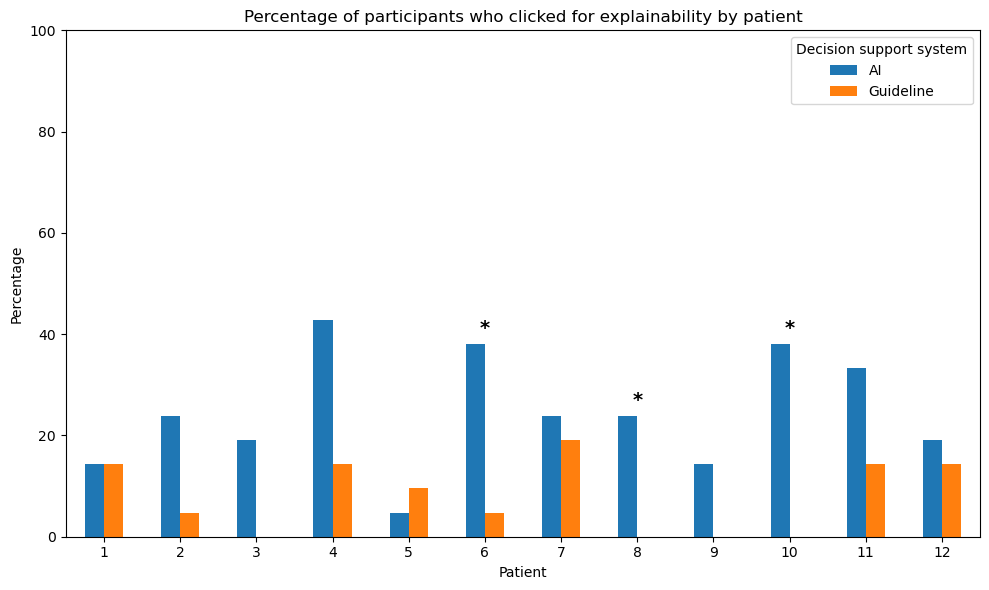

In [48]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Pivot the DataFrame to have 'cdss' and 'soc' as separate columns
pivot_df = clicks_filtered_percentage.pivot(index='patient', columns='link_clicks_categories', values='percentage')

# Reorder columns to ensure 'AI CDSS' comes first
ordered_columns = ['predictiondetailsLink', 'guidelinedetailsLink']
pivot_df = pivot_df[ordered_columns]

# Rename columns for the plot
pivot_df.columns = ['AI', 'Guideline']

# Create a bar plot
pivot_df.plot(kind='bar', ax=plt.gca())#, legend=False)

# Rotate x-axis labels
plt.xticks(rotation=0)

# Set y-axis limits
plt.ylim(0, 100)  # 0 to 1 in decimal form, which is 0% to 100%

# Update the legend labels
plt.legend(title='Decision support system')

# Add labels and title
plt.title('Percentage of participants who clicked for explainability by patient')
plt.xlabel('Patient')
plt.ylabel('Percentage')

# Annotate each patient group with its p-value, positioned dynamically
'''for i, patient in enumerate(pivot_df.index):
    max_height = pivot_df.loc[patient].max()  # Get the highest bar for the patient
    plt.text(i, max_height + 2, f"{p_values[i]:.2f}", ha='center', fontsize=10, color='black')'''
# Annotate significant results with "*"
for i, patient in enumerate(pivot_df.index):
    max_height = pivot_df.loc[patient].max()  # Get the highest bar for the patient
    
    # Only add "*" if p-value is ≤ 0.05
    if p_values[i] <= 0.05:
        plt.text(i, max_height + 2, "*", ha='center', fontsize=14, color='black', fontweight='bold')

# Show plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

In [75]:
# Demographics

# Get data
guideline_click_count = clicks[clicks['link_clicks'] == 'guidelinedetailsLink'].groupby(['user_id']).count().reset_index().rename(columns={'user_archetype': 'guideline_count'})[['user_id', 'guideline_count']]
ai_click_count = clicks[clicks['link_clicks'] == 'predictiondetailsLink'].groupby(['user_id']).count().reset_index().rename(columns={'user_archetype': 'ai_count'})[['user_id', 'ai_count']]

# Merge
click_count = pd.merge(ai_click_count, guideline_click_count, how='outer')

# Merge with demographics
click_count_demographic = click_count.merge(demographics[['user_id', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']])
# Imputation with Mode for categorical columns
click_count_demographic['age_new'].fillna(click_count_demographic['age_new'].mode()[0], inplace=True)
click_count_demographic['sex_new'].fillna(click_count_demographic['sex_new'].mode()[0], inplace=True)
click_count_demographic['medical_speciality_new'].fillna(click_count_demographic['medical_speciality_new'].mode()[0], inplace=True)
click_count_demographic['grade_new'].fillna(click_count_demographic['grade_new'].mode()[0], inplace=True)
click_count_demographic['ai_familiarity_new'].fillna(click_count_demographic['ai_familiarity_new'].mode()[0], inplace=True)

In [76]:
click_count_demographic

,user_id,ai_count,guideline_count,user_archetype,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
0,0,4.0,2.0,a,30s,Male,Pharmacist,Other,Slightly familiar
1,3,3.0,2.0,b,30s,Female,Infectious Diseases,Other,Not familiar
2,4,1.0,NaN,a,30s,Male,Other,Consultant,Slightly familiar
3,5,3.0,NaN,b,40s,Male,Other,Consultant,Moderately familiar
4,8,2.0,NaN,a,30s,Female,Pharmacist,Other,Slightly familiar
5,10,5.0,1.0,a,30s,Male,Microbiology,Consultant,Very familiar
6,16,3.0,1.0,a,50s,Male,Infectious Diseases,Consultant,Slightly familiar
7,17,1.0,NaN,b,40s,Male,Microbiology,Consultant,Slightly familiar
8,19,1.0,1.0,b,50s,Female,Microbiology,Consultant,Moderately familiar
9,21,5.0,1.0,b,20s,Female,Pharmacist,Other,Not familiar


In [77]:
from scipy.stats import f_oneway, kruskal, ttest_ind, mannwhitneyu, shapiro, levene


def check_normality(group):
    if len(group) < 3:
        return False  # Not enough data to perform the test
    stat, p = shapiro(group)
    return p > 0.05

def check_homogeneity(groups):
    stat, p = levene(*groups)
    return p > 0.05

# Function to perform comparative analysis
def comparative_analysis(df, categorical_vars, target_var):
    results = []

    for var in categorical_vars:
        unique_values = df[var].unique()
        groups = [df[df[var] == val][target_var] for val in unique_values]
        
        # Check normality for each group
        normal = all(check_normality(group) for group in groups)
        # Check homogeneity of variances
        homogeneity = check_homogeneity(groups)
        
        if len(unique_values) > 2:
            if normal and homogeneity:
                # ANOVA for more than two groups if assumptions are met
                f_stat, p_value_anova = f_oneway(*groups)
                results.append({
                    'variable': var,
                    'test': 'ANOVA',
                    'stat': f_stat,
                    'p_value': p_value_anova
                })
            else:
                # Kruskal-Wallis for more than two groups if assumptions are not met
                h_stat, p_value_kruskal = kruskal(*groups)
                results.append({
                    'variable': var,
                    'test': 'Kruskal-Wallis',
                    'stat': h_stat,
                    'p_value': p_value_kruskal
                })
        elif len(unique_values) == 2:
            if normal and homogeneity:
                # T-test for two groups if assumptions are met
                t_stat, p_value_ttest = ttest_ind(groups[0], groups[1])
                results.append({
                    'variable': var,
                    'test': 'T-test',
                    'stat': t_stat,
                    'p_value': p_value_ttest
                })
            else:
                # Mann-Whitney U for two groups if assumptions are not met
                u_stat, p_value_mannwhitney = mannwhitneyu(groups[0], groups[1])
                results.append({
                    'variable': var,
                    'test': 'Mann-Whitney U',
                    'stat': u_stat,
                    'p_value': p_value_mannwhitney
                })

    return pd.DataFrame(results)

# Define demographics
categorical_vars = ['user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']

# Perform comparative analysis
ai_comparative_results_df = comparative_analysis(click_count_demographic.drop(columns=['guideline_count']).dropna(), categorical_vars, 'ai_count') # Drop na or just get nan
guideline_comparative_results_df = comparative_analysis(click_count_demographic.drop(columns=['ai_count']).dropna(), categorical_vars, 'guideline_count') # Drop na or just get nan

In [78]:
ai_comparative_results_df

,variable,test,stat,p_value
0,user_archetype,Mann-Whitney U,96.000000,0.059517
1,age_new,Kruskal-Wallis,1.217042,0.748920
2,sex_new,Mann-Whitney U,74.500000,0.562392
3,medical_speciality_new,Kruskal-Wallis,6.556563,0.087458
4,grade_new,Mann-Whitney U,71.500000,0.699352
5,ai_familiarity_new,Kruskal-Wallis,1.188930,0.755660


In [79]:
guideline_comparative_results_df

,variable,test,stat,p_value
0,user_archetype,Mann-Whitney U,19.000000,0.636602
1,age_new,Kruskal-Wallis,4.836735,0.304463
2,sex_new,Mann-Whitney U,19.000000,0.636602
3,medical_speciality_new,Kruskal-Wallis,3.446429,0.327777
4,grade_new,Mann-Whitney U,25.500000,0.175334
5,ai_familiarity_new,Kruskal-Wallis,2.246032,0.522939


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='user_archetype', ylabel='ai_count'>

Text(0.5, 1.0, 'Box Plot of AI Count by User Archetype')

Text(0.5, 0, 'User Archetype')

Text(0, 0.5, 'AI Count')

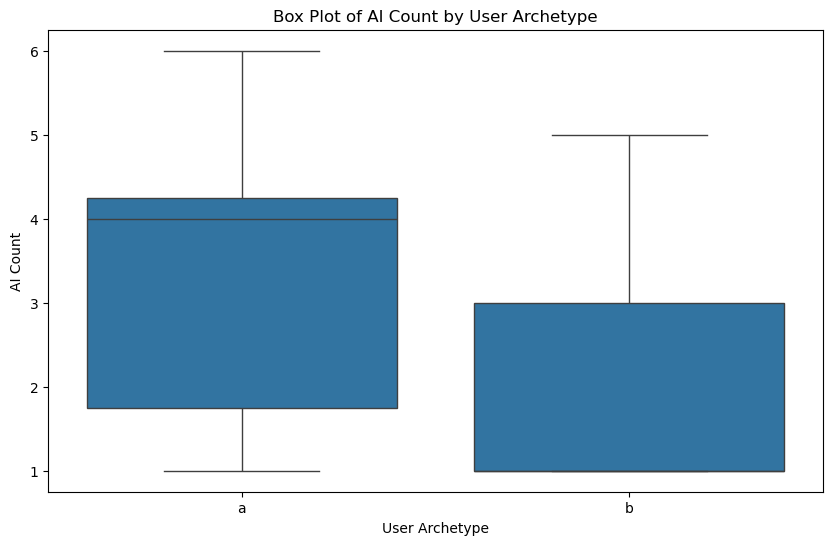

In [80]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_archetype', y='ai_count', data=click_count_demographic.drop(columns=['guideline_count']).dropna())
plt.title('Box Plot of AI Count by User Archetype')
plt.xlabel('User Archetype')
plt.ylabel('AI Count')
plt.show()

# legend_clicks

In [81]:
legend_clicks.variable.value_counts()

variable
Respiratory Rate                        32
Heart Rate                              31
Systolic Blood Pressure                 28
Glasgow Coma Score                      26
Diastolic Blood Pressure                25
SpO2                                    25
Temperature                             14
Glasgow Coma Score - motor response     13
Glasgow Coma Score – eye opening        12
Mean Blood Pressure                     11
Glasgow Coma Score - verbal response    11
Mean Arterial Pressure                  10
Name: count, dtype: int64

In [82]:
legend_clicks.user_id.nunique()
print('percentage that clicked on graph: %.2f' % (legend_clicks.user_id.nunique()/len(demographics)*100))

8

percentage that clicked on graph: 19.05
